In [14]:
import os
import csv
import random

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KDTree

from sirp.scda import scda
from sirp.scda import vgg16_extractor as vgg16
from sirp.scda import inception_v3_extractor as inception
from sirp.scda import inception_resnet_v2_extractor as inception_resnet

In [17]:
IMAGES_LIST = 'dresses.csv'
DATASET_PATH = '/home/ml/polyvore/'

In [18]:
with open(IMAGES_LIST, 'r') as images_list:
    reader = csv.reader(images_list)
    images = [row[1] for row in reader]

In [19]:
vgg16_extractor = vgg16.get_extractor()
inception_resnet_extractor = inception_resnet.get_extractor()
inception_extractor = inception.get_extractor()

### Generating trees
Now we generate KD trees for descriptions of each model. On GPU it should take about 4-5 minutes (for 3340 images).

In [20]:
mask_descriptors = False

vgg_descriptions = []
inception_descriptions = []
inception_resnet_descriptions = []
print('\nVGG16')
for i, file in enumerate(images):
    print('\r', i, end='')
    img = scda.load_img(os.path.join(DATASET_PATH, file))
    activations = scda.extract_features(vgg16_extractor, img,
                                        vgg16.preprocess_input)
    mask = None
    if mask_descriptors:
        aggregation_map, threshold = scda.aggregate(activations)
        mask = scda.get_mask(aggregation_map, threshold)
    description = scda.aggregate_descriptors(activations, mask=mask)
    vgg_descriptions.append(description)

print('\nInceptionV3')
for i, file in enumerate(images):
    print('\r', i, end='')
    img = scda.load_img(os.path.join(DATASET_PATH, file))
    activations = scda.extract_features(inception_extractor, img,
                                        inception.preprocess_input)
    mask = None
    if mask_descriptors:
        aggregation_map, threshold = scda.aggregate(activations)
        mask = scda.get_mask(aggregation_map, threshold)
    description = scda.aggregate_descriptors(activations)
    inception_descriptions.append(description)

print('\nInception Resnet V2')
for i, file in enumerate(images):
    print('\r', i, end='')
    img = scda.load_img(os.path.join(DATASET_PATH, file))
    activations = scda.extract_features(inception_resnet_extractor, img,
                                        inception_resnet.preprocess_input)
    mask = None
    if mask_descriptors:
        aggregation_map, threshold = scda.aggregate(activations)
        mask = scda.get_mask(aggregation_map, threshold)
    description = scda.aggregate_descriptors(activations)
    inception_resnet_descriptions.append(description)



VGG16
 3340
InceptionV3
 3340
Inception Resnet V2
 3340

In [21]:
vgg_tree = KDTree(vgg_descriptions)
inception_tree = KDTree(inception_descriptions)
inception_resnet_tree = KDTree(inception_resnet_descriptions)

2352 polyvore-dataset/images/images/187519450/1.jpg


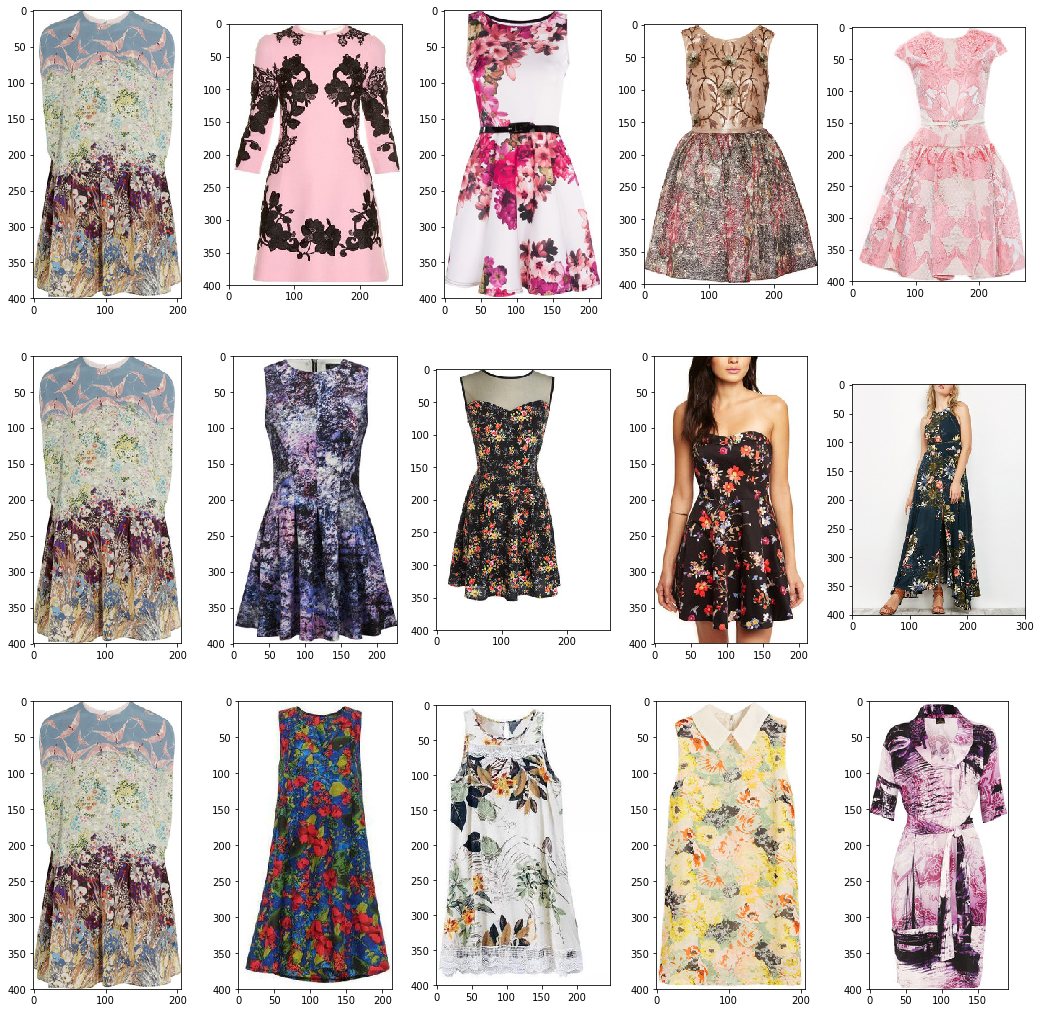

In [25]:
fig=plt.figure(figsize=(18, 18))
random_idx = random.randrange(len(images))
print(random_idx, images[random_idx])
dist, idx = vgg_tree.query([vgg_descriptions[random_idx]], k=5, sort_results=True)
vgg_results = idx[0]
dist, idx = inception_tree.query([inception_descriptions[random_idx]], k=5, sort_results=True)
inception_results = idx[0]
dist, idx = inception_resnet_tree.query([inception_resnet_descriptions[random_idx]], k=5, sort_results=True)
inception_resnet_results = idx[0]
for j in range(5):
    plt.subplot(3, 5, j+1)
    img = matplotlib.image.imread(os.path.join(DATASET_PATH, images[vgg_results[j]]))
    plt.imshow(img)
    plt.subplot(3, 5, j+6)
    img = matplotlib.image.imread(os.path.join(DATASET_PATH, images[inception_results[j]]))
    plt.imshow(img)
    plt.subplot(3, 5, j+11)
    img = matplotlib.image.imread(os.path.join(DATASET_PATH, images[inception_resnet_results[j]]))
    plt.imshow(img)
    plt.savefig(str(random_idx) + 'comp.jpg')